In [1]:
# Import necessary libraries
from fnal import Dataset
from utilities import plot_planes, plot_crate, plot_tpc, plot_wire_planes, plot_waveform, plot_ffts, plot_planes_new

In [2]:
# Load the data and MC datasets
input_path = '/Users/mueller/data/noise/epoch0/'
data = [Dataset(f'{input_path}run09394.root'), Dataset(f'{input_path}montecarlo_nominal.root')]
labels = ['Run 9394 (Model Base)', 'Monte Carlo (Nominal)']

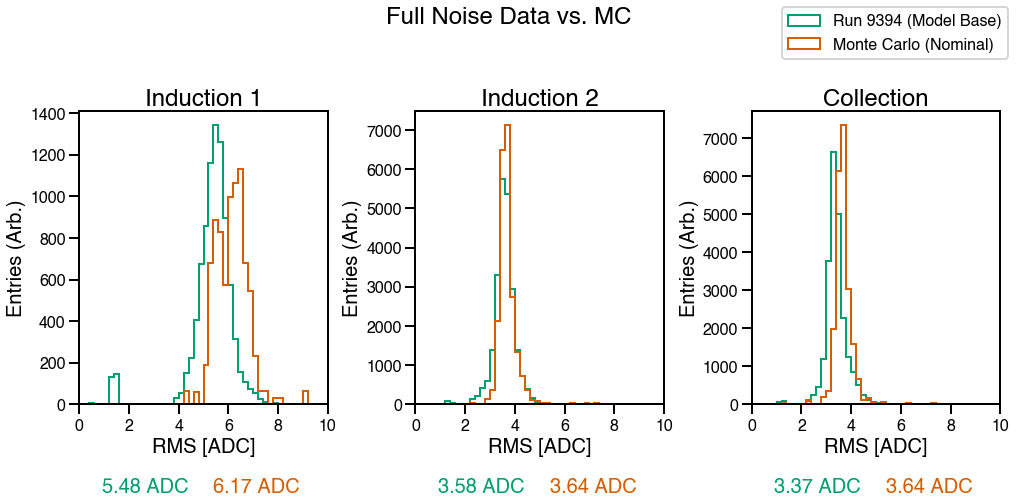

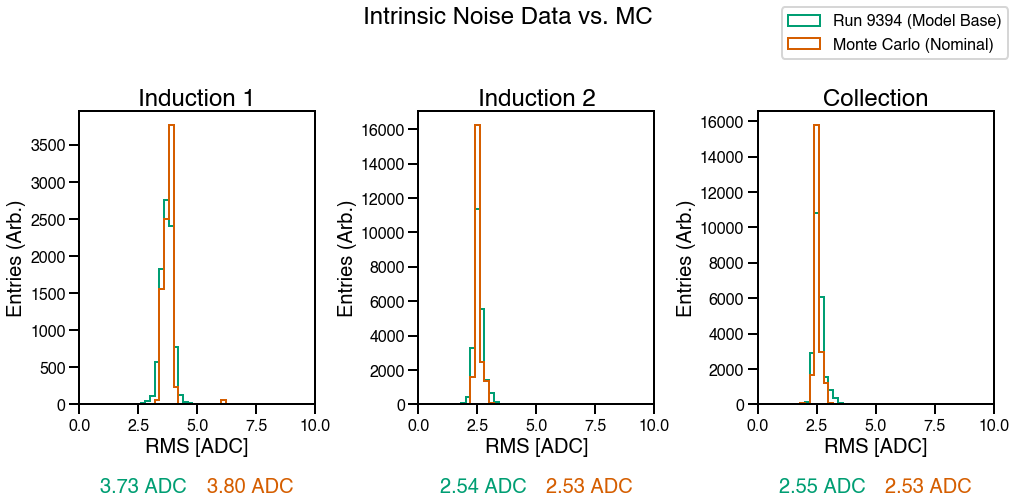

In [3]:
plot_planes_new(data, labels, 'raw_rms', 'Full Noise Data vs. MC')
plot_planes_new(data, labels, 'int_rms', 'Intrinsic Noise Data vs. MC')

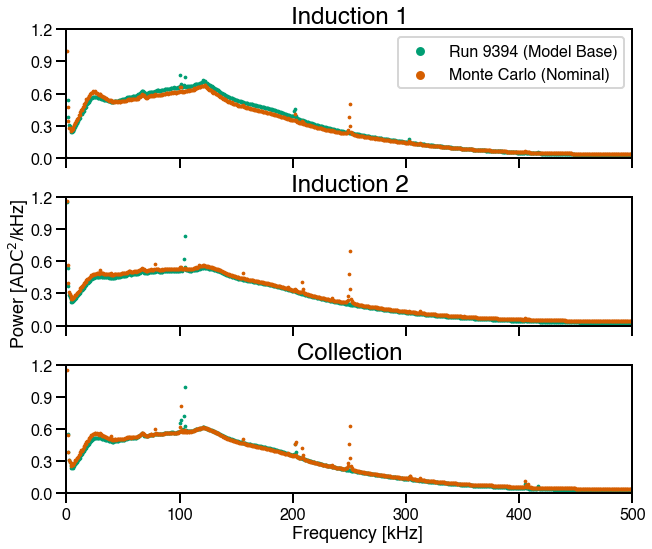

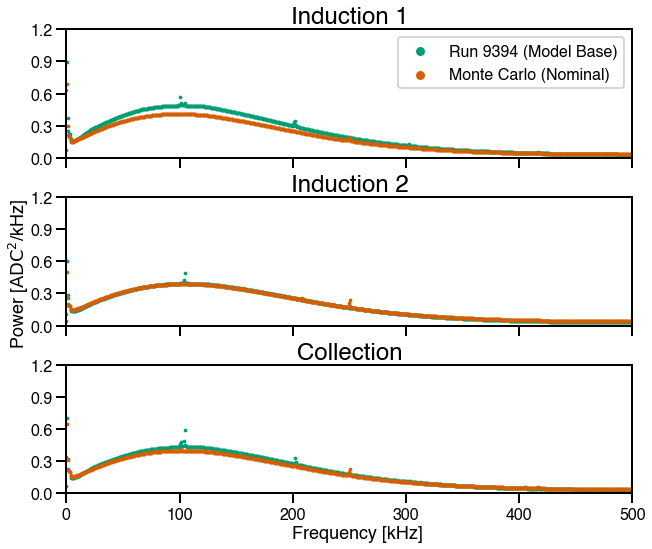

In [4]:
# Comparison of FFTs in data and MC.
plot_ffts(data, labels, 'raw')
plot_ffts(data, labels, 'int')

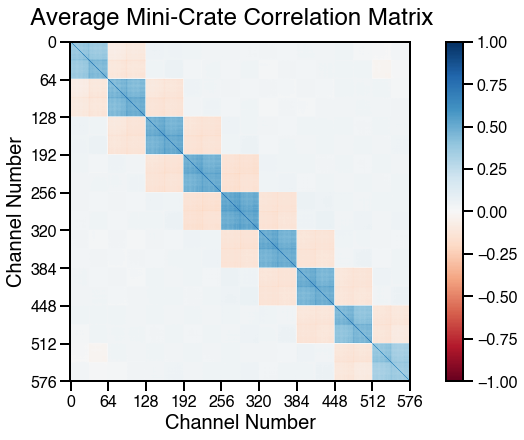

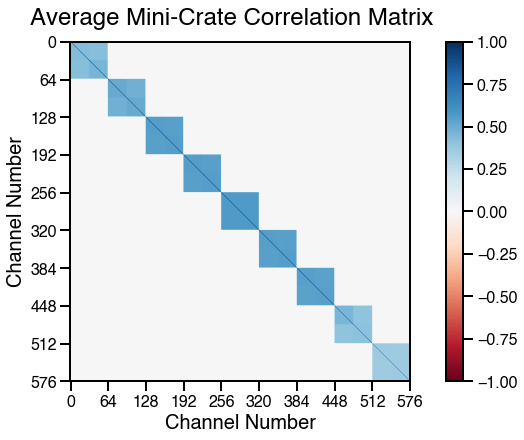

In [5]:
# Comparison of correlation matrices between data and MC.
data[0].plot_correlation_matrix('all')
data[1].plot_correlation_matrix('all')

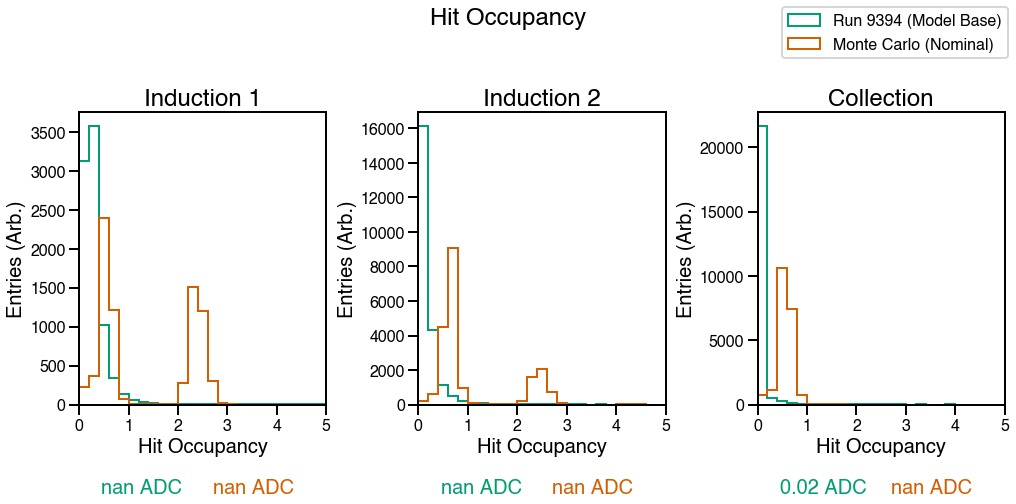

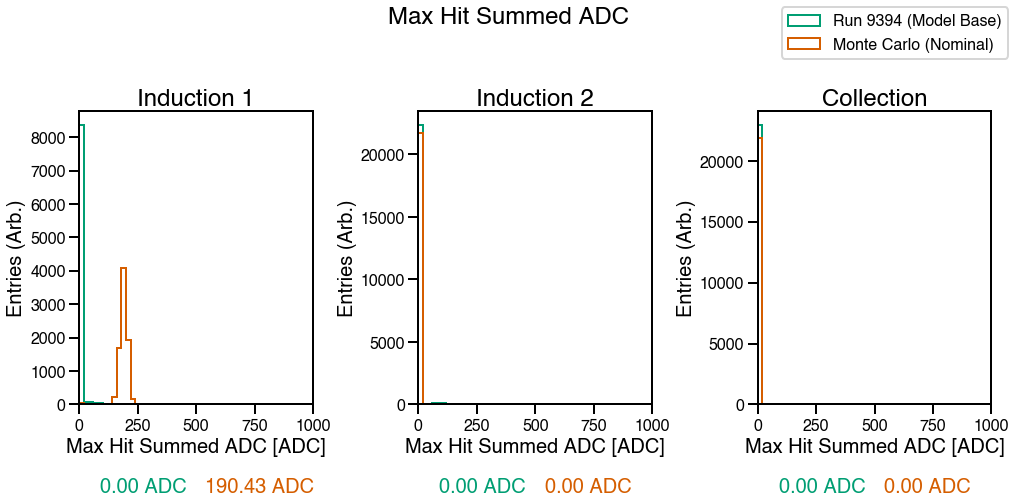

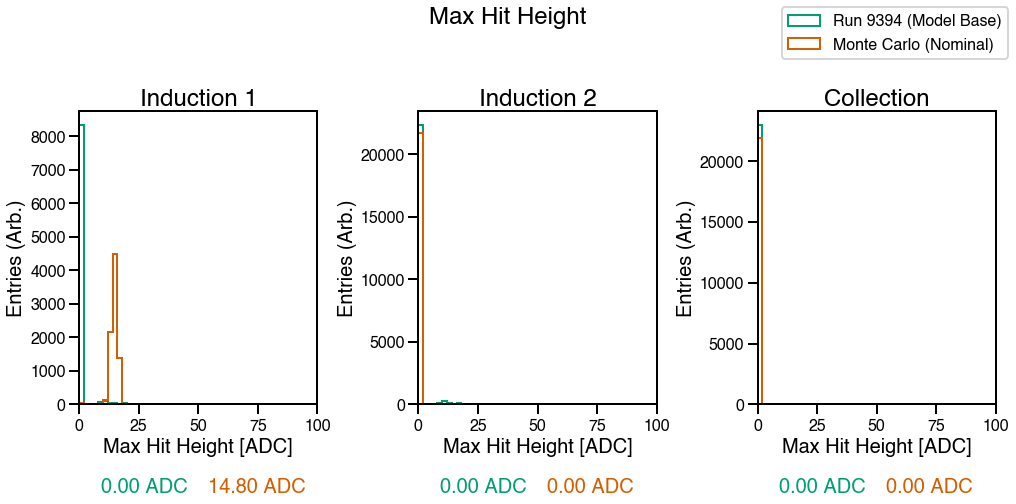

In [6]:
plot_planes_new(data, labels, 'hit_occupancy', 'Hit Occupancy')
plot_planes_new(data, labels, 'mhit_sadc', 'Max Hit Summed ADC')
plot_planes_new(data, labels, 'mhit_height', 'Max Hit Height')

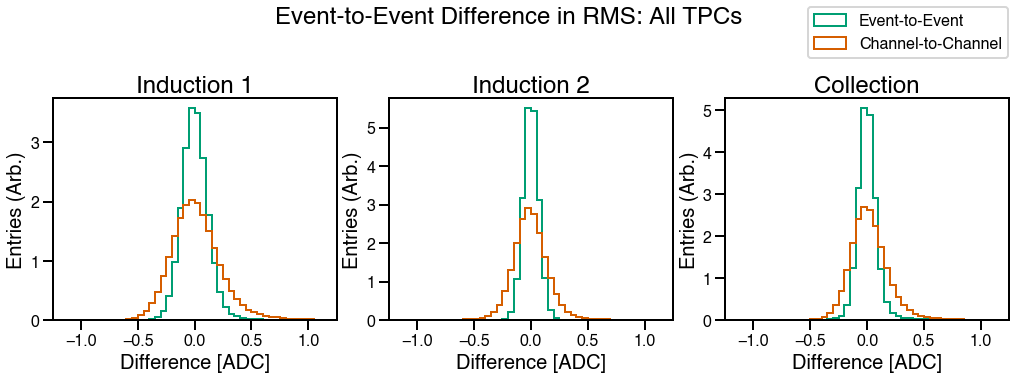

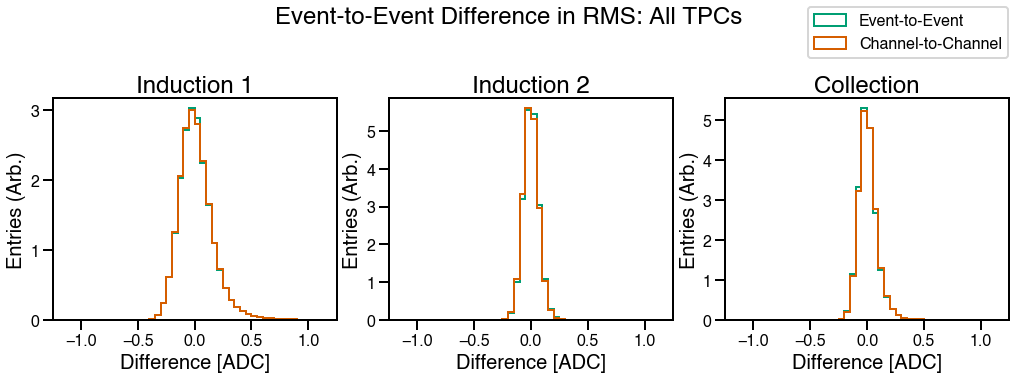

In [7]:
# Comparison of event-to-event and channel-to-channel variations between data and MC.
plot_planes(data[0], 'int_rms', ['e2eabs', 'c2cabs'])
plot_planes(data[1], 'int_rms', ['e2eabs', 'c2cabs'])